In [49]:
#libraries for data cleaning
import numpy as np
import pandas as pd

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for pre_processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#libraries for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("desktop/py_files/data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#from the above data we can see that some of our feature columns has 0 values,which in not possible.
#So,we will replace those datas with missing values.

In [12]:
#replacing the 0 with np.nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [13]:
df.isnull().sum()#now checking the nan values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
#calculating the median_value of our columns
median1=df.Glucose.median()
median2=df.BloodPressure.median()
median3=df.SkinThickness.median()
median4=df.Insulin.median()
median5=df.BMI.median()

In [20]:
#replacing the nan values with median values
df.Glucose.fillna(median1,inplace=True)
df.BloodPressure.fillna(median2,inplace=True)
df.SkinThickness.fillna(median3,inplace=True)
df.Insulin.fillna(median4,inplace=True)
df.BMI.fillna(median5,inplace=True)

In [21]:
df.isnull().sum()#replacing all our nan values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot:>

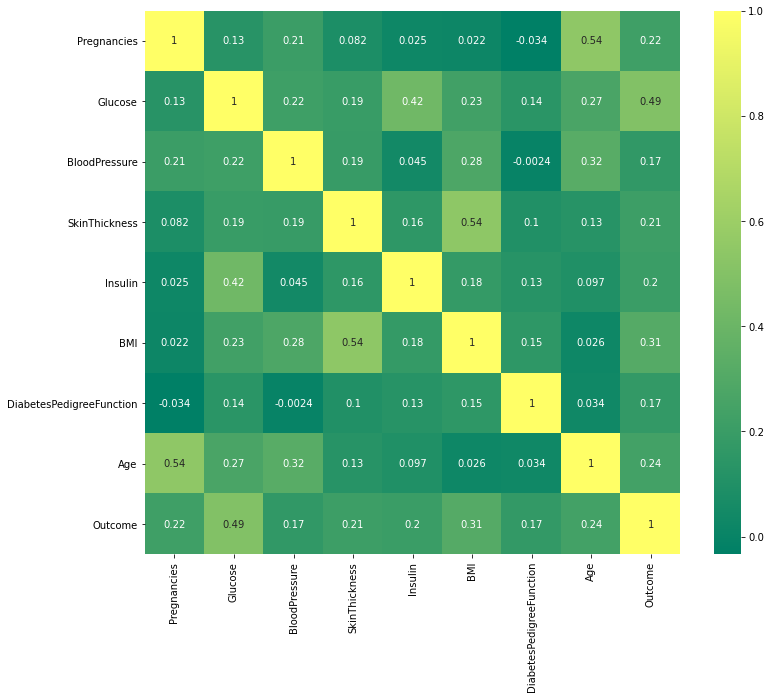

In [36]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="summer")
#Checking the relation among our data(s) through a heat map

In [46]:
#scaling down our data to have a better accuracy & Sepearting our independent and target column
sc=StandardScaler()
x =  pd.DataFrame(sc.fit_transform(df.drop(["Outcome"],axis = 1)),columns=df.columns[:-1])
y = df.Outcome

In [47]:
#splitting our data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42)

In [64]:
#checking our model score(basic model)
knn=KNeighborsClassifier(1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
knn.score(X_test,y_test)

0.6640625

In [69]:
#we can see that our model score is pretty poor..so we have to do some tuning and adjust our
# k value to elevate our model performance

In [75]:
#checking model performance:(k=1)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[124  46]
 [ 40  46]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       170
           1       0.50      0.53      0.52        86

    accuracy                           0.66       256
   macro avg       0.63      0.63      0.63       256
weighted avg       0.67      0.66      0.67       256



In [76]:
#finding the best value for k

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

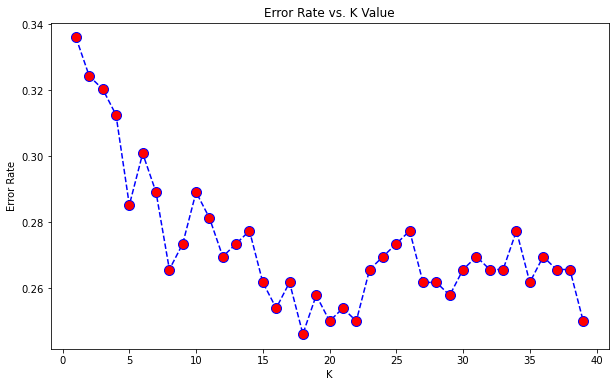

In [77]:
#plotting error_rate vs k to find k value

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#we can see at k=18 we are getting minimum error rate..s

In [79]:
#checking model performance:(k=18)
knn_1=KNeighborsClassifier(18)
knn_1.fit(X_train,y_train)
pred_1 = knn.predict(X_test)
knn_1.score(X_test,y_test)

0.75390625

In [80]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_1))
print(classification_report(y_test,pred_1))

[[146  24]
 [ 40  46]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       170
           1       0.66      0.53      0.59        86

    accuracy                           0.75       256
   macro avg       0.72      0.70      0.70       256
weighted avg       0.74      0.75      0.74       256



In [ ]:
#we can see there is a significant improvement of our model